In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 2 hours later the temperature is 74$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [15]:
dt = 2
T0 = 85
T2 = 74
T_amb = 65

DTdt = (T2-T0)/dt

print('Forward  diffrence: K= {:1.2f}' .format(DTdt/-(T0-T_amb)))
print('Backward diffrence: K= {:1.2f}' .format(DTdt/-(T2-T_amb)))

K= (DTdt/-(T0-T_amb)+DTdt/-(T2-T_amb))/2

Forward  diffrence: K= 0.28
Backward diffrence: K= 0.61


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [16]:
K = -((T2-T0)/dt)/(T0-T_amb)

def ret_k(T0, T2, T_amb, dt):
    '''Takes 2 temperature values, ambient temperature, and elapased time 
    and returns K using forward diffrence 
    T0 = Temp 1
    T2 = Temp 2
    T_amb = ambient temp
    dT = Change in time'''
    K = -((T2-T0)/dt)/(T0-T_amb)
    return K

k= ret_k(T0, T2, T_amb, dt)

3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

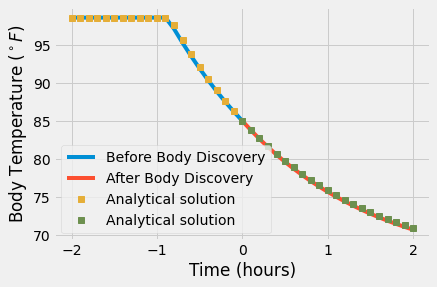

In [17]:
t = np.linspace(0, 2, 21)
dt = t[1]- t[0]
T_amb = 65
K = 0.61

T_eul_f = np.zeros(len(t))
T_eul_b = np.zeros(len(t))
T_anal_b = np.zeros(len(t))
T_anal_f = T_anal_b


T_eul_f[0] = 85
T_eul_b[0] = 85
T_anal_b[0] = 85 

T_anal_b= T_amb+(T_anal_b[0] - T_amb)*np.exp(K*t)
T_anal_f= T_amb+(T_anal_b[0] - T_amb)*np.exp(-K*t)

for i in range(1, len(t)):
    T_eul_f[i] = T_eul_f[i-1] - K*(T_eul_f[i-1] - T_amb)*dt
    T_eul_b[i] = T_eul_b[i-1] + K*(T_eul_b[i-1] - T_amb)*dt

T_eul_b[T_eul_b > 98.6] = 98.6
T_anal_b[T_anal_b > 98.6] = 98.6

plt.plot(-t, T_eul_b,  label='Before Body Discovery')
plt.plot(t, T_eul_f, label='After Body Discovery')
plt.plot(-t, T_anal_b,'s',t, T_anal_f,'s', label='Analytical solution')
plt.legend(loc='best')
plt.ylabel('Body Temperature ($^\circ F$)')
plt.xlabel('Time (hours)');

The temperature as t$\rightarrow\infty$ will be equal to $T_{amb}$ 

The analytical solutions converge to the euler approximation.

In [46]:
T_bod= 98.6
tod= -1/K*np.log((T_bod-T_amb)/(T0-T_amb))

# print(tod*60)

print('TOD was {:3.1f} hours before the body was found at 1009' .format(-tod))






TOD was 0.9 hours before the body was found at 1009
